In [1]:
import os
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import torch.optim as optimizers
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets
import torchvision.transforms as transforms 
import seaborn as sns 
from callback import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
class BiRNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__() 
        self.l1 = nn.LSTM(1463, hidden_dim, batch_first=True, bidirectional=True)
        self.l2 = nn.Linear(hidden_dim*2, 2) 

        nn.init.xavier_normal_(self.l1.weight_ih_l0) 
        nn.init.orthogonal_(self.l1.weight_hh_l0)
        nn.init.xavier_normal_(self.l2.weight) 

    def forward(self, x):
        h, _ = self.l1(x) 
        y = self.l2(h) 
        return y

In [3]:
def clean(df):
    #共通で不要
    col = ['start(exchange)[ms]', 'end(system)[ms]', 'end(exchange)[ms]',\
    'kinectstart(exchange)[ms]', 'kinectend(system)[ms]',\
    'kinectend(exchange)[ms]', 'SS_ternary', 'TC_ternary', 'TS_ternary', 'SS',\
    'TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TS1', 'TS2', 'TS3', 'TS4', 'TS5',
    ]

    res = []
    
    for data in df:
        res.append(data.drop(col, axis=1).values.tolist())

    return res

In [4]:
def louocv(files, testfile):

    train_df = []
    test_df = []


    for file in files:
        if file == testfile:
            test_df.append(pd.read_csv(file))
        else:
            train_df.append(pd.read_csv(file))

    return train_df, test_df

In [5]:
def make_target(df):
    res = [] 

    for data in df:
        tmp = data.loc[:, 'TS1':'TS5'].sum(axis=1) > 20
        res.append(tmp.astype('int'))
    return res

In [6]:
def make_scaler(datas):
    scaler = StandardScaler() 
    res = []
    for data in datas:
        res.append(data[0])
    res = np.array(res)
    scaler.fit(res)
    return scaler 

In [7]:
def standardize(datas, scaler):
    res = []
    for data in datas:
        res.append(scaler.transform(data).tolist())
    return res

1人目
25
2
epoch: 1, loss: 0.545, acc: 0.729, val_loss: 0.686, val_acc: 0.637
epoch: 2, loss: 0.406, acc: 0.828, val_loss: 0.657, val_acc: 0.645
epoch: 3, loss: 0.326, acc: 0.864, val_loss: 0.67, val_acc: 0.645
epoch: 4, loss: 0.257, acc: 0.912, val_loss: 0.727, val_acc: 0.628
epoch: 5, loss: 0.196, acc: 0.946, val_loss: 0.864, val_acc: 0.628
epoch: 6, loss: 0.167, acc: 0.956, val_loss: 0.92, val_acc: 0.637
epoch: 7, loss: 0.199, acc: 0.925, val_loss: 0.727, val_acc: 0.612
epoch: 8, loss: 0.219, acc: 0.910, val_loss: 0.718, val_acc: 0.645
early stopping


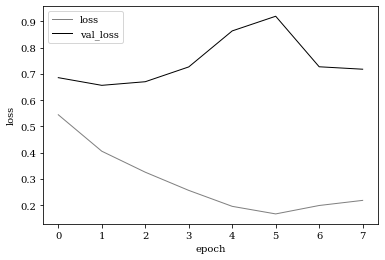

test_loss: 0.911, test_acc: 0.622
2人目
25
2
epoch: 1, loss: 0.568, acc: 0.709, val_loss: 0.583, val_acc: 0.735
epoch: 2, loss: 0.408, acc: 0.820, val_loss: 0.527, val_acc: 0.718
epoch: 3, loss: 0.336, acc: 0.867, val_loss: 0.517, val_acc: 0.732
epoch: 4, loss: 0.272, acc: 0.904, val_loss: 0.55, val_acc: 0.723
epoch: 5, loss: 0.214, acc: 0.933, val_loss: 0.551, val_acc: 0.754
epoch: 6, loss: 0.166, acc: 0.959, val_loss: 0.584, val_acc: 0.755
epoch: 7, loss: 0.129, acc: 0.976, val_loss: 0.598, val_acc: 0.747
epoch: 8, loss: 0.105, acc: 0.983, val_loss: 0.632, val_acc: 0.758
epoch: 9, loss: 0.103, acc: 0.981, val_loss: 0.64, val_acc: 0.712
early stopping


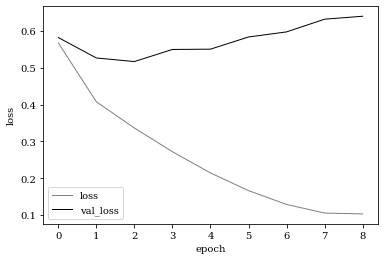

test_loss: 0.818, test_acc: 0.626
3人目
25
2
epoch: 1, loss: 0.605, acc: 0.716, val_loss: 0.525, val_acc: 0.710
epoch: 2, loss: 0.432, acc: 0.802, val_loss: 0.511, val_acc: 0.729
epoch: 3, loss: 0.371, acc: 0.838, val_loss: 0.515, val_acc: 0.750
epoch: 4, loss: 0.304, acc: 0.883, val_loss: 0.521, val_acc: 0.720
epoch: 5, loss: 0.243, acc: 0.921, val_loss: 0.545, val_acc: 0.729
epoch: 6, loss: 0.186, acc: 0.954, val_loss: 0.595, val_acc: 0.713
epoch: 7, loss: 0.143, acc: 0.970, val_loss: 0.612, val_acc: 0.708
epoch: 8, loss: 0.108, acc: 0.986, val_loss: 0.577, val_acc: 0.720
early stopping


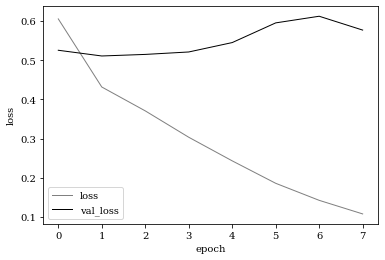

test_loss: 0.664, test_acc: 0.650
4人目
25
2
epoch: 1, loss: 0.592, acc: 0.703, val_loss: 0.469, val_acc: 0.782
epoch: 2, loss: 0.447, acc: 0.797, val_loss: 0.495, val_acc: 0.740
epoch: 3, loss: 0.392, acc: 0.836, val_loss: 0.47, val_acc: 0.763
epoch: 4, loss: 0.337, acc: 0.870, val_loss: 0.473, val_acc: 0.765
epoch: 5, loss: 0.292, acc: 0.892, val_loss: 0.492, val_acc: 0.755
epoch: 6, loss: 0.253, acc: 0.914, val_loss: 0.543, val_acc: 0.752
epoch: 7, loss: 0.213, acc: 0.931, val_loss: 0.61, val_acc: 0.759
early stopping


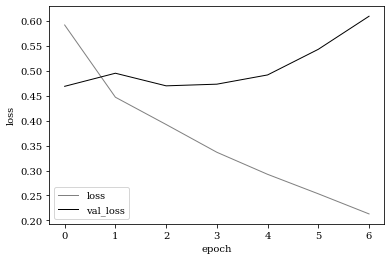

test_loss: 0.444, test_acc: 0.793
5人目
25
2
epoch: 1, loss: 0.551, acc: 0.726, val_loss: 0.547, val_acc: 0.726
epoch: 2, loss: 0.407, acc: 0.818, val_loss: 0.537, val_acc: 0.683
epoch: 3, loss: 0.335, acc: 0.873, val_loss: 0.534, val_acc: 0.698
epoch: 4, loss: 0.265, acc: 0.901, val_loss: 0.568, val_acc: 0.667
epoch: 5, loss: 0.201, acc: 0.942, val_loss: 0.6, val_acc: 0.691
epoch: 6, loss: 0.155, acc: 0.967, val_loss: 0.631, val_acc: 0.665
epoch: 7, loss: 0.132, acc: 0.968, val_loss: 0.568, val_acc: 0.761
epoch: 8, loss: 0.179, acc: 0.934, val_loss: 0.535, val_acc: 0.782
epoch: 9, loss: 0.208, acc: 0.917, val_loss: 0.538, val_acc: 0.756
early stopping


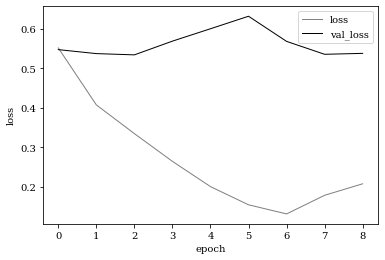

test_loss: 0.514, test_acc: 0.764
6人目
25
2
epoch: 1, loss: 0.589, acc: 0.689, val_loss: 0.528, val_acc: 0.780
epoch: 2, loss: 0.427, acc: 0.805, val_loss: 0.509, val_acc: 0.774
epoch: 3, loss: 0.358, acc: 0.851, val_loss: 0.534, val_acc: 0.757
epoch: 4, loss: 0.292, acc: 0.890, val_loss: 0.539, val_acc: 0.786
epoch: 5, loss: 0.232, acc: 0.933, val_loss: 0.597, val_acc: 0.805
epoch: 6, loss: 0.178, acc: 0.958, val_loss: 0.591, val_acc: 0.792
epoch: 7, loss: 0.145, acc: 0.967, val_loss: 0.599, val_acc: 0.781
epoch: 8, loss: 0.159, acc: 0.952, val_loss: 0.837, val_acc: 0.734
early stopping


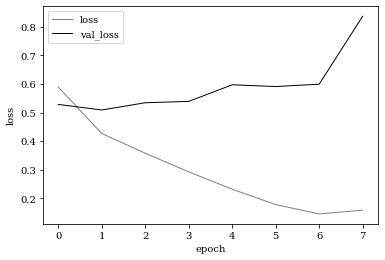

test_loss: 0.752, test_acc: 0.735
7人目
25
2
epoch: 1, loss: 0.582, acc: 0.703, val_loss: 0.622, val_acc: 0.703
epoch: 2, loss: 0.427, acc: 0.813, val_loss: 0.635, val_acc: 0.688
epoch: 3, loss: 0.348, acc: 0.864, val_loss: 0.688, val_acc: 0.682
epoch: 4, loss: 0.292, acc: 0.892, val_loss: 0.704, val_acc: 0.672
epoch: 5, loss: 0.241, acc: 0.927, val_loss: 0.833, val_acc: 0.572
epoch: 6, loss: 0.196, acc: 0.941, val_loss: 0.841, val_acc: 0.640
epoch: 7, loss: 0.174, acc: 0.945, val_loss: 0.979, val_acc: 0.591
early stopping


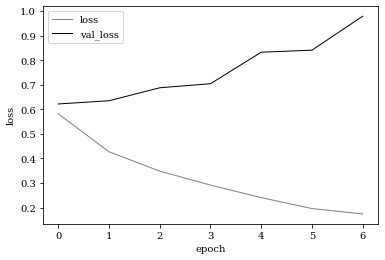

test_loss: 0.803, test_acc: 0.737
8人目
25
2
epoch: 1, loss: 0.636, acc: 0.682, val_loss: 0.578, val_acc: 0.736
epoch: 2, loss: 0.442, acc: 0.804, val_loss: 0.572, val_acc: 0.742
epoch: 3, loss: 0.368, acc: 0.843, val_loss: 0.564, val_acc: 0.748
epoch: 4, loss: 0.302, acc: 0.891, val_loss: 0.566, val_acc: 0.714
epoch: 5, loss: 0.241, acc: 0.925, val_loss: 0.569, val_acc: 0.714
epoch: 6, loss: 0.185, acc: 0.953, val_loss: 0.585, val_acc: 0.702
epoch: 7, loss: 0.138, acc: 0.974, val_loss: 0.623, val_acc: 0.708
epoch: 8, loss: 0.106, acc: 0.986, val_loss: 0.672, val_acc: 0.708
epoch: 9, loss: 0.0948, acc: 0.983, val_loss: 0.667, val_acc: 0.685
early stopping


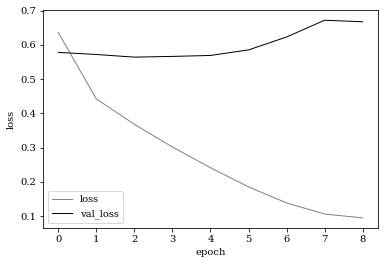

test_loss: 0.592, test_acc: 0.773
9人目
25
2
epoch: 1, loss: 0.56, acc: 0.714, val_loss: 0.533, val_acc: 0.731
epoch: 2, loss: 0.417, acc: 0.817, val_loss: 0.56, val_acc: 0.723
epoch: 3, loss: 0.345, acc: 0.850, val_loss: 0.551, val_acc: 0.724
epoch: 4, loss: 0.275, acc: 0.897, val_loss: 0.553, val_acc: 0.740
epoch: 5, loss: 0.216, acc: 0.929, val_loss: 0.645, val_acc: 0.733
epoch: 6, loss: 0.174, acc: 0.955, val_loss: 0.75, val_acc: 0.695
epoch: 7, loss: 0.153, acc: 0.961, val_loss: 0.657, val_acc: 0.632
early stopping


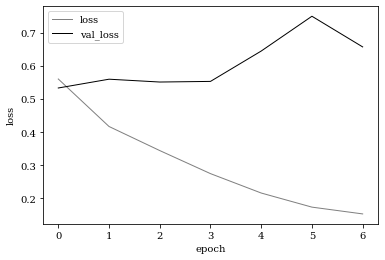

test_loss: 0.740, test_acc: 0.644
10人目
25
2
epoch: 1, loss: 0.612, acc: 0.693, val_loss: 0.514, val_acc: 0.748
epoch: 2, loss: 0.452, acc: 0.786, val_loss: 0.485, val_acc: 0.795
epoch: 3, loss: 0.388, acc: 0.829, val_loss: 0.494, val_acc: 0.802
epoch: 4, loss: 0.326, acc: 0.867, val_loss: 0.504, val_acc: 0.786
epoch: 5, loss: 0.27, acc: 0.900, val_loss: 0.534, val_acc: 0.779
epoch: 6, loss: 0.217, acc: 0.939, val_loss: 0.531, val_acc: 0.793
epoch: 7, loss: 0.171, acc: 0.958, val_loss: 0.553, val_acc: 0.784
epoch: 8, loss: 0.144, acc: 0.967, val_loss: 0.621, val_acc: 0.782
early stopping


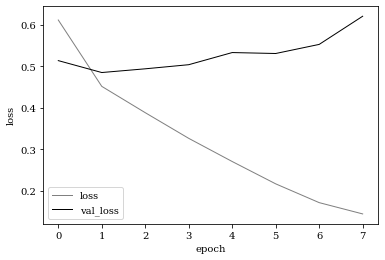

test_loss: 0.607, test_acc: 0.713
11人目
25
2
epoch: 1, loss: 0.561, acc: 0.713, val_loss: 0.597, val_acc: 0.663
epoch: 2, loss: 0.442, acc: 0.809, val_loss: 0.591, val_acc: 0.708
epoch: 3, loss: 0.375, acc: 0.847, val_loss: 0.596, val_acc: 0.731
epoch: 4, loss: 0.315, acc: 0.868, val_loss: 0.604, val_acc: 0.736
epoch: 5, loss: 0.264, acc: 0.901, val_loss: 0.639, val_acc: 0.754
epoch: 6, loss: 0.219, acc: 0.924, val_loss: 0.674, val_acc: 0.699
epoch: 7, loss: 0.183, acc: 0.942, val_loss: 0.666, val_acc: 0.703
epoch: 8, loss: 0.164, acc: 0.950, val_loss: 0.598, val_acc: 0.738
early stopping


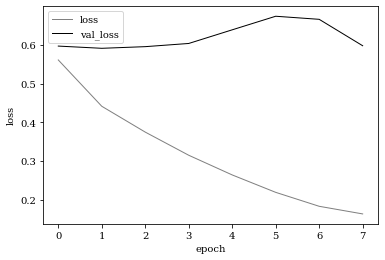

test_loss: 0.584, test_acc: 0.771
12人目
25
2
epoch: 1, loss: 0.574, acc: 0.714, val_loss: 0.467, val_acc: 0.775
epoch: 2, loss: 0.429, acc: 0.807, val_loss: 0.409, val_acc: 0.838
epoch: 3, loss: 0.361, acc: 0.854, val_loss: 0.425, val_acc: 0.809
epoch: 4, loss: 0.295, acc: 0.891, val_loss: 0.429, val_acc: 0.809
epoch: 5, loss: 0.234, acc: 0.927, val_loss: 0.431, val_acc: 0.808
epoch: 6, loss: 0.181, acc: 0.954, val_loss: 0.452, val_acc: 0.796
epoch: 7, loss: 0.139, acc: 0.970, val_loss: 0.503, val_acc: 0.797
epoch: 8, loss: 0.129, acc: 0.969, val_loss: 0.492, val_acc: 0.799
early stopping


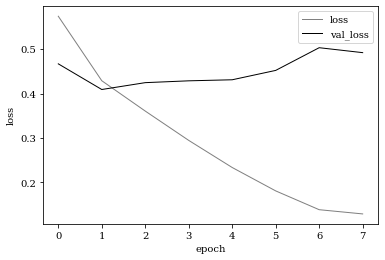

test_loss: 0.682, test_acc: 0.689
13人目
25
2
epoch: 1, loss: 0.565, acc: 0.712, val_loss: 0.616, val_acc: 0.670
epoch: 2, loss: 0.421, acc: 0.811, val_loss: 0.608, val_acc: 0.703
epoch: 3, loss: 0.348, acc: 0.855, val_loss: 0.601, val_acc: 0.700
epoch: 4, loss: 0.279, acc: 0.899, val_loss: 0.598, val_acc: 0.714
epoch: 5, loss: 0.216, acc: 0.937, val_loss: 0.636, val_acc: 0.667
epoch: 6, loss: 0.178, acc: 0.952, val_loss: 0.605, val_acc: 0.714
epoch: 7, loss: 0.16, acc: 0.956, val_loss: 0.775, val_acc: 0.695
epoch: 8, loss: 0.24, acc: 0.893, val_loss: 0.723, val_acc: 0.650
epoch: 9, loss: 0.16, acc: 0.954, val_loss: 0.669, val_acc: 0.734
epoch: 10, loss: 0.105, acc: 0.974, val_loss: 0.698, val_acc: 0.714
early stopping


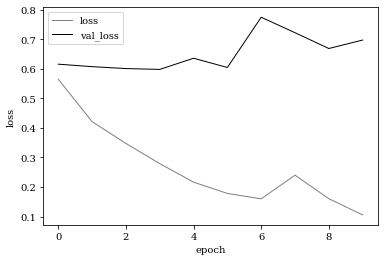

test_loss: 0.420, test_acc: 0.857
14人目
25
2
epoch: 1, loss: 0.595, acc: 0.700, val_loss: 0.477, val_acc: 0.739
epoch: 2, loss: 0.43, acc: 0.800, val_loss: 0.454, val_acc: 0.766
epoch: 3, loss: 0.356, acc: 0.844, val_loss: 0.448, val_acc: 0.787
epoch: 4, loss: 0.29, acc: 0.886, val_loss: 0.443, val_acc: 0.799
epoch: 5, loss: 0.227, acc: 0.931, val_loss: 0.443, val_acc: 0.781
epoch: 6, loss: 0.171, acc: 0.965, val_loss: 0.444, val_acc: 0.804
epoch: 7, loss: 0.133, acc: 0.978, val_loss: 0.436, val_acc: 0.801
epoch: 8, loss: 0.118, acc: 0.971, val_loss: 0.541, val_acc: 0.779
epoch: 9, loss: 0.13, acc: 0.963, val_loss: 0.494, val_acc: 0.764
epoch: 10, loss: 0.102, acc: 0.972, val_loss: 0.454, val_acc: 0.793
epoch: 11, loss: 0.118, acc: 0.959, val_loss: 0.493, val_acc: 0.787
epoch: 12, loss: 0.0849, acc: 0.981, val_loss: 0.507, val_acc: 0.787
epoch: 13, loss: 0.0654, acc: 0.992, val_loss: 0.512, val_acc: 0.797
early stopping


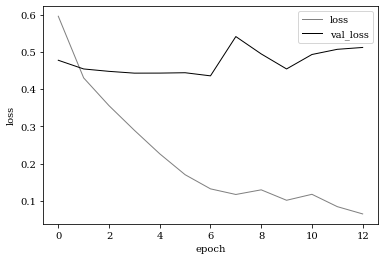

test_loss: 0.758, test_acc: 0.649
15人目
25
2
epoch: 1, loss: 0.575, acc: 0.705, val_loss: 0.519, val_acc: 0.761
epoch: 2, loss: 0.405, acc: 0.824, val_loss: 0.501, val_acc: 0.806
epoch: 3, loss: 0.329, acc: 0.870, val_loss: 0.508, val_acc: 0.758
epoch: 4, loss: 0.266, acc: 0.906, val_loss: 0.511, val_acc: 0.771
epoch: 5, loss: 0.209, acc: 0.935, val_loss: 0.534, val_acc: 0.738
epoch: 6, loss: 0.161, acc: 0.963, val_loss: 0.6, val_acc: 0.708
epoch: 7, loss: 0.13, acc: 0.978, val_loss: 0.631, val_acc: 0.730
epoch: 8, loss: 0.12, acc: 0.969, val_loss: 0.581, val_acc: 0.739
early stopping


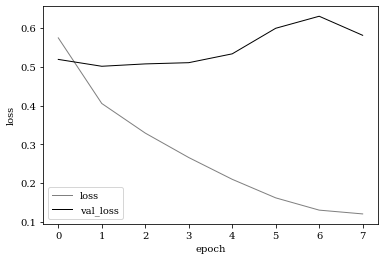

test_loss: 0.512, test_acc: 0.744
16人目
25
2
epoch: 1, loss: 0.6, acc: 0.710, val_loss: 0.552, val_acc: 0.733
epoch: 2, loss: 0.444, acc: 0.790, val_loss: 0.54, val_acc: 0.759
epoch: 3, loss: 0.37, acc: 0.837, val_loss: 0.544, val_acc: 0.745
epoch: 4, loss: 0.306, acc: 0.878, val_loss: 0.523, val_acc: 0.773
epoch: 5, loss: 0.248, acc: 0.912, val_loss: 0.531, val_acc: 0.766
epoch: 6, loss: 0.194, acc: 0.950, val_loss: 0.547, val_acc: 0.769
epoch: 7, loss: 0.154, acc: 0.962, val_loss: 0.533, val_acc: 0.778
epoch: 8, loss: 0.149, acc: 0.960, val_loss: 0.551, val_acc: 0.754
epoch: 9, loss: 0.132, acc: 0.968, val_loss: 0.702, val_acc: 0.701
epoch: 10, loss: 0.13, acc: 0.962, val_loss: 0.553, val_acc: 0.784
early stopping


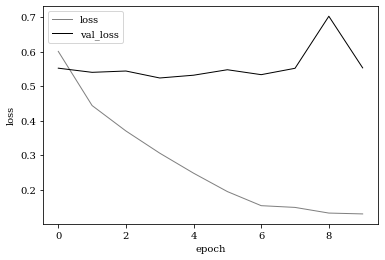

test_loss: 0.245, test_acc: 0.875
17人目
25
2
epoch: 1, loss: 0.556, acc: 0.723, val_loss: 0.51, val_acc: 0.739
epoch: 2, loss: 0.427, acc: 0.809, val_loss: 0.54, val_acc: 0.722
epoch: 3, loss: 0.366, acc: 0.850, val_loss: 0.55, val_acc: 0.681
epoch: 4, loss: 0.309, acc: 0.887, val_loss: 0.563, val_acc: 0.698
epoch: 5, loss: 0.255, acc: 0.913, val_loss: 0.58, val_acc: 0.693
epoch: 6, loss: 0.207, acc: 0.939, val_loss: 0.619, val_acc: 0.669
epoch: 7, loss: 0.174, acc: 0.949, val_loss: 0.56, val_acc: 0.716
early stopping


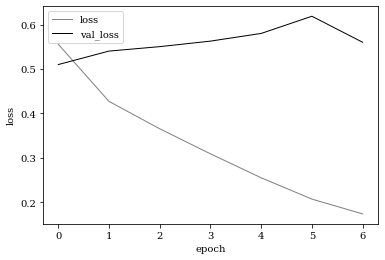

test_loss: 0.707, test_acc: 0.641
18人目
25
2
epoch: 1, loss: 0.601, acc: 0.697, val_loss: 0.395, val_acc: 0.817
epoch: 2, loss: 0.457, acc: 0.794, val_loss: 0.416, val_acc: 0.817
epoch: 3, loss: 0.398, acc: 0.821, val_loss: 0.428, val_acc: 0.804
epoch: 4, loss: 0.337, acc: 0.860, val_loss: 0.466, val_acc: 0.761
epoch: 5, loss: 0.278, acc: 0.892, val_loss: 0.481, val_acc: 0.754
epoch: 6, loss: 0.224, acc: 0.928, val_loss: 0.517, val_acc: 0.747
epoch: 7, loss: 0.176, acc: 0.950, val_loss: 0.529, val_acc: 0.754
early stopping


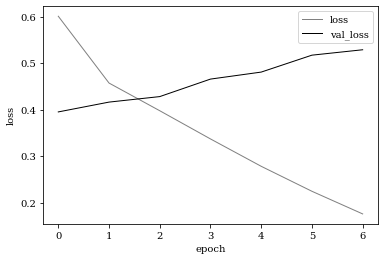

test_loss: 0.488, test_acc: 0.729
19人目
25
2
epoch: 1, loss: 0.59, acc: 0.708, val_loss: 0.527, val_acc: 0.739
epoch: 2, loss: 0.443, acc: 0.800, val_loss: 0.505, val_acc: 0.739
epoch: 3, loss: 0.386, acc: 0.841, val_loss: 0.516, val_acc: 0.743
epoch: 4, loss: 0.327, acc: 0.877, val_loss: 0.528, val_acc: 0.736
epoch: 5, loss: 0.261, acc: 0.911, val_loss: 0.533, val_acc: 0.759
epoch: 6, loss: 0.202, acc: 0.941, val_loss: 0.574, val_acc: 0.771
epoch: 7, loss: 0.155, acc: 0.967, val_loss: 0.547, val_acc: 0.774
epoch: 8, loss: 0.124, acc: 0.980, val_loss: 0.747, val_acc: 0.715
early stopping


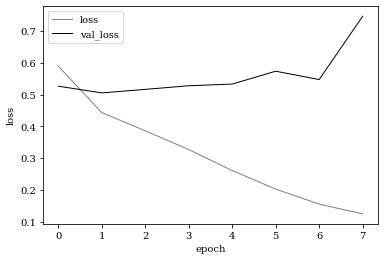

test_loss: 0.446, test_acc: 0.825
20人目
25
2
epoch: 1, loss: 0.557, acc: 0.716, val_loss: 0.462, val_acc: 0.777
epoch: 2, loss: 0.423, acc: 0.807, val_loss: 0.466, val_acc: 0.791
epoch: 3, loss: 0.343, acc: 0.864, val_loss: 0.499, val_acc: 0.772
epoch: 4, loss: 0.276, acc: 0.898, val_loss: 0.492, val_acc: 0.791
epoch: 5, loss: 0.218, acc: 0.936, val_loss: 0.476, val_acc: 0.791
epoch: 6, loss: 0.169, acc: 0.958, val_loss: 0.525, val_acc: 0.740
epoch: 7, loss: 0.129, acc: 0.978, val_loss: 0.613, val_acc: 0.710
early stopping


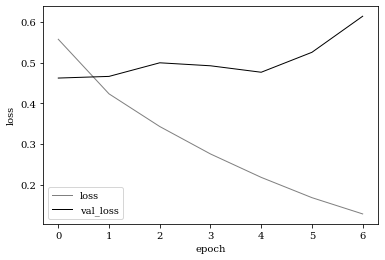

test_loss: 0.466, test_acc: 0.819
21人目
25
2
epoch: 1, loss: 0.626, acc: 0.671, val_loss: 0.457, val_acc: 0.747
epoch: 2, loss: 0.437, acc: 0.802, val_loss: 0.439, val_acc: 0.753
epoch: 3, loss: 0.371, acc: 0.850, val_loss: 0.46, val_acc: 0.739
epoch: 4, loss: 0.3, acc: 0.889, val_loss: 0.475, val_acc: 0.739
epoch: 5, loss: 0.235, acc: 0.929, val_loss: 0.461, val_acc: 0.767
epoch: 6, loss: 0.181, acc: 0.959, val_loss: 0.436, val_acc: 0.781
epoch: 7, loss: 0.155, acc: 0.965, val_loss: 0.599, val_acc: 0.740
epoch: 8, loss: 0.167, acc: 0.947, val_loss: 0.532, val_acc: 0.767
epoch: 9, loss: 0.175, acc: 0.936, val_loss: 0.468, val_acc: 0.795
epoch: 10, loss: 0.118, acc: 0.974, val_loss: 0.561, val_acc: 0.768
epoch: 11, loss: 0.09, acc: 0.983, val_loss: 0.512, val_acc: 0.761
epoch: 12, loss: 0.0699, acc: 0.990, val_loss: 0.702, val_acc: 0.726
early stopping


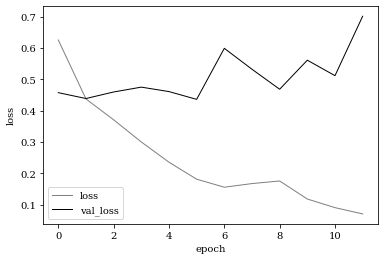

test_loss: 0.495, test_acc: 0.811
22人目
25
2
epoch: 1, loss: 0.591, acc: 0.682, val_loss: 0.566, val_acc: 0.729
epoch: 2, loss: 0.426, acc: 0.813, val_loss: 0.589, val_acc: 0.712
epoch: 3, loss: 0.346, acc: 0.857, val_loss: 0.628, val_acc: 0.696
epoch: 4, loss: 0.278, acc: 0.900, val_loss: 0.633, val_acc: 0.707
epoch: 5, loss: 0.217, acc: 0.935, val_loss: 0.673, val_acc: 0.686
epoch: 6, loss: 0.167, acc: 0.963, val_loss: 0.724, val_acc: 0.693
epoch: 7, loss: 0.13, acc: 0.974, val_loss: 0.84, val_acc: 0.638
early stopping


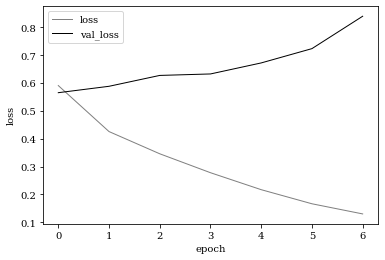

test_loss: 0.325, test_acc: 0.841
23人目
25
2
epoch: 1, loss: 0.574, acc: 0.706, val_loss: 0.534, val_acc: 0.757
epoch: 2, loss: 0.413, acc: 0.820, val_loss: 0.493, val_acc: 0.747
epoch: 3, loss: 0.351, acc: 0.855, val_loss: 0.502, val_acc: 0.730
epoch: 4, loss: 0.288, acc: 0.889, val_loss: 0.478, val_acc: 0.747
epoch: 5, loss: 0.23, acc: 0.932, val_loss: 0.445, val_acc: 0.763
epoch: 6, loss: 0.184, acc: 0.955, val_loss: 0.44, val_acc: 0.782
epoch: 7, loss: 0.162, acc: 0.955, val_loss: 0.456, val_acc: 0.782
epoch: 8, loss: 0.144, acc: 0.960, val_loss: 0.532, val_acc: 0.745
epoch: 9, loss: 0.154, acc: 0.945, val_loss: 0.631, val_acc: 0.713
epoch: 10, loss: 0.162, acc: 0.947, val_loss: 0.67, val_acc: 0.667
epoch: 11, loss: 0.203, acc: 0.918, val_loss: 0.714, val_acc: 0.727
epoch: 12, loss: 0.243, acc: 0.902, val_loss: 1.02, val_acc: 0.713
early stopping


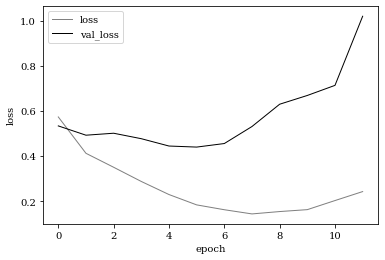

test_loss: 1.225, test_acc: 0.640
24人目
25
2
epoch: 1, loss: 0.564, acc: 0.708, val_loss: 0.595, val_acc: 0.701
epoch: 2, loss: 0.443, acc: 0.797, val_loss: 0.62, val_acc: 0.718
epoch: 3, loss: 0.384, acc: 0.833, val_loss: 0.6, val_acc: 0.719
epoch: 4, loss: 0.319, acc: 0.872, val_loss: 0.634, val_acc: 0.736
epoch: 5, loss: 0.261, acc: 0.906, val_loss: 0.677, val_acc: 0.742
epoch: 6, loss: 0.214, acc: 0.935, val_loss: 0.731, val_acc: 0.729
epoch: 7, loss: 0.175, acc: 0.951, val_loss: 0.764, val_acc: 0.711
early stopping


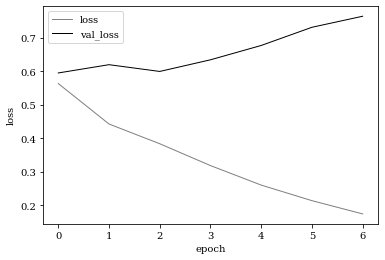

test_loss: 0.846, test_acc: 0.672
25人目
25
2
epoch: 1, loss: 0.573, acc: 0.710, val_loss: 0.423, val_acc: 0.797
epoch: 2, loss: 0.41, acc: 0.813, val_loss: 0.42, val_acc: 0.816
epoch: 3, loss: 0.332, acc: 0.865, val_loss: 0.419, val_acc: 0.802
epoch: 4, loss: 0.265, acc: 0.905, val_loss: 0.424, val_acc: 0.815
epoch: 5, loss: 0.205, acc: 0.938, val_loss: 0.425, val_acc: 0.809
epoch: 6, loss: 0.161, acc: 0.964, val_loss: 0.547, val_acc: 0.793
epoch: 7, loss: 0.147, acc: 0.967, val_loss: 0.49, val_acc: 0.784
epoch: 8, loss: 0.166, acc: 0.945, val_loss: 0.463, val_acc: 0.820
epoch: 9, loss: 0.146, acc: 0.956, val_loss: 0.706, val_acc: 0.753
early stopping


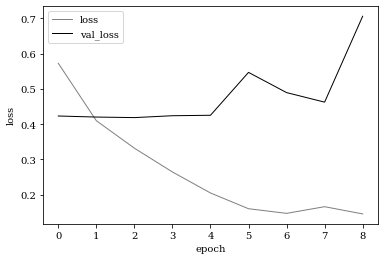

test_loss: 0.683, test_acc: 0.626
26人目
25
2
epoch: 1, loss: 0.567, acc: 0.710, val_loss: 0.419, val_acc: 0.792
epoch: 2, loss: 0.433, acc: 0.801, val_loss: 0.378, val_acc: 0.837
epoch: 3, loss: 0.358, acc: 0.853, val_loss: 0.361, val_acc: 0.842
epoch: 4, loss: 0.29, acc: 0.889, val_loss: 0.333, val_acc: 0.863
epoch: 5, loss: 0.228, acc: 0.929, val_loss: 0.33, val_acc: 0.845
epoch: 6, loss: 0.18, acc: 0.956, val_loss: 0.438, val_acc: 0.766
epoch: 7, loss: 0.151, acc: 0.967, val_loss: 0.331, val_acc: 0.855
epoch: 8, loss: 0.161, acc: 0.949, val_loss: 0.356, val_acc: 0.886
epoch: 9, loss: 0.198, acc: 0.919, val_loss: 0.314, val_acc: 0.870
epoch: 10, loss: 0.138, acc: 0.956, val_loss: 0.318, val_acc: 0.873
epoch: 11, loss: 0.0942, acc: 0.981, val_loss: 0.386, val_acc: 0.837
epoch: 12, loss: 0.0866, acc: 0.979, val_loss: 0.366, val_acc: 0.866
epoch: 13, loss: 0.0689, acc: 0.987, val_loss: 0.354, val_acc: 0.873
epoch: 14, loss: 0.0737, acc: 0.980, val_loss: 0.308, val_acc: 0.875
epoch: 15, l

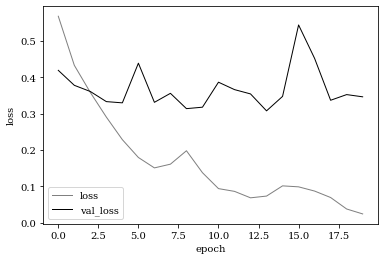

test_loss: 0.692, test_acc: 0.779
27人目
25
2
epoch: 1, loss: 0.57, acc: 0.708, val_loss: 0.552, val_acc: 0.706
epoch: 2, loss: 0.416, acc: 0.812, val_loss: 0.548, val_acc: 0.712
epoch: 3, loss: 0.349, acc: 0.858, val_loss: 0.564, val_acc: 0.738
epoch: 4, loss: 0.283, acc: 0.894, val_loss: 0.595, val_acc: 0.717
epoch: 5, loss: 0.224, acc: 0.929, val_loss: 0.637, val_acc: 0.717
epoch: 6, loss: 0.168, acc: 0.961, val_loss: 0.65, val_acc: 0.703
epoch: 7, loss: 0.135, acc: 0.969, val_loss: 0.64, val_acc: 0.724
epoch: 8, loss: 0.13, acc: 0.967, val_loss: 0.767, val_acc: 0.671
early stopping


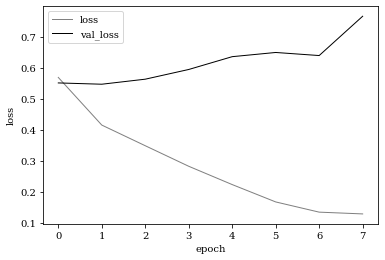

test_loss: 0.723, test_acc: 0.636
28人目
25
2
epoch: 1, loss: 0.588, acc: 0.686, val_loss: 0.478, val_acc: 0.759
epoch: 2, loss: 0.434, acc: 0.803, val_loss: 0.447, val_acc: 0.803
epoch: 3, loss: 0.371, acc: 0.842, val_loss: 0.465, val_acc: 0.761
epoch: 4, loss: 0.305, acc: 0.879, val_loss: 0.442, val_acc: 0.768
epoch: 5, loss: 0.241, acc: 0.923, val_loss: 0.472, val_acc: 0.747
epoch: 6, loss: 0.185, acc: 0.949, val_loss: 0.47, val_acc: 0.746
epoch: 7, loss: 0.144, acc: 0.970, val_loss: 0.464, val_acc: 0.774
epoch: 8, loss: 0.128, acc: 0.973, val_loss: 0.466, val_acc: 0.788
epoch: 9, loss: 0.158, acc: 0.942, val_loss: 0.533, val_acc: 0.747
epoch: 10, loss: 0.199, acc: 0.920, val_loss: 0.506, val_acc: 0.802
early stopping


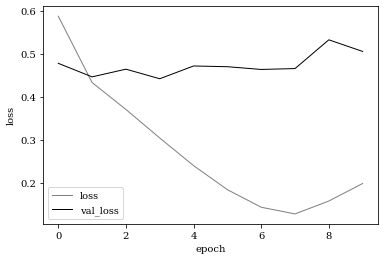

test_loss: 1.028, test_acc: 0.714


In [8]:
FILE_PATH = "/home/r-yanagimoto/Hazumi1902/dumpfiles/*.csv"
files = glob.glob(FILE_PATH)

test_preds = []
test_ans = []

i = 0

for testfile in files:
    i += 1
    print(f'{i}人目')
    train_df, test_df = louocv(files, testfile)

    train_data = clean(train_df)
    train_target = make_target(train_df)


    test_data = clean(test_df)
    test_target = make_target(test_df)
    
    x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=2, shuffle=True)

    print(len(x_train))
    print(len(x_valid))
    scaler = make_scaler(x_train)
    x_train = standardize(x_train, scaler) 
    x_valid = standardize(x_valid, scaler) 
    test_data = standardize(test_data, scaler)

    model = BiRNN(50) 


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), amsgrad=True)

    def compute_loss(t, y):
        return criterion(y, t)

    def train_step(x, t):
        model.train()
        preds = model(x)
        loss = compute_loss(t, preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss, preds

    def val_step(x, t):
        model.eval()
        preds = model(x)
        loss = criterion(preds, t)

        return loss, preds

    # エポック数
    epochs = 200
    hist = {'loss': [], 'accuracy': [],
            'val_loss': [], 'val_accuracy': []}
    es = EarlyStopping(patience=5, verbose=1)

    for epoch in range(epochs):
        train_loss = 0. 
        train_acc = 0. 
        val_loss = 0. 
        val_acc = 0. 

        for (x, t) in zip(x_train, y_train):
            x = torch.tensor(x)
            t = torch.tensor(t)
            loss, preds = train_step(x, t) 
            train_loss += loss.item() 
            train_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        train_loss /= len(x_train) 
        train_acc /= len(x_train) 

        for (x, t) in zip(x_valid, y_valid):
            x = torch.tensor(x) 
            t = torch.tensor(t)
            loss, preds = val_step(x, t) 
            val_loss += loss.item() 
            val_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        val_loss /= len(x_valid) 
        val_acc /= len(x_valid)

        hist['loss'].append(train_loss) 
        hist['accuracy'].append(train_acc) 
        hist['val_loss'].append(val_loss) 
        hist['val_accuracy'].append(val_acc) 

        print('epoch: {}, loss: {:.3}, acc: {:.3f}, val_loss: {:.3}, val_acc: {:.3f}'.format(epoch+1, train_loss, train_acc, val_loss, val_acc))

        if es(val_loss):
            break
    
    # モデルの評価
    loss = hist['loss'] 
    val_loss = hist['val_loss'] 

    fig = plt.figure() 
    plt.rc('font', family='serif') 
    plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss') 
    plt.plot(range(len(val_loss)), val_loss, color='black', linewidth=1, label='val_loss') 
    plt.xlabel('epoch') 
    plt.ylabel('loss') 
    plt.legend() 
    plt.show() 

    # テストデータの評価
    def test_step(x, t):
        return val_step(x, t) 

    test_loss = 0.
    test_acc = 0. 

    for (x, t) in zip(test_data, test_target):
        x = torch.tensor(x) 
        t = torch.tensor(t)
        loss, preds = test_step(x, t) 
        test_loss += loss.item() 
        test_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 
    
    print('test_loss: {:.3f}, test_acc: {:.3f}'.format(test_loss, test_acc))

    test_ans = test_ans + test_target[0].values.tolist()
    test_preds = test_preds + torch.argmax(preds, dim=1).tolist()

In [12]:
print(classification_report(test_ans, test_preds))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       816
           1       0.78      0.79      0.79      1521

    accuracy                           0.72      2337
   macro avg       0.70      0.69      0.69      2337
weighted avg       0.72      0.72      0.72      2337



In [13]:
print(accuracy_score(test_ans, test_preds))

0.72400513478819


[[ 484  332]
 [ 313 1208]]


<AxesSubplot:>

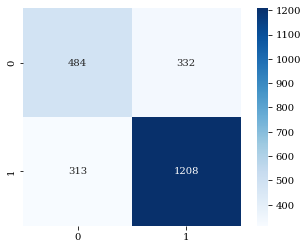

In [11]:
cm = confusion_matrix(test_ans, test_preds)
print(cm)

sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='d')